(20000, 7, 3)
(20000, 1025)
(20000, 1025)


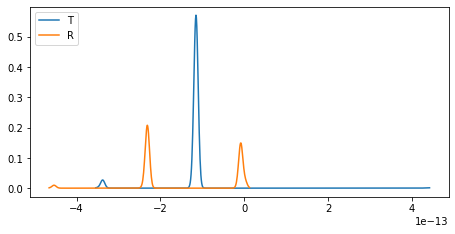

[[['1' '7.641e-06' 'silicono2']
  ['3.4777237564709433' '1.331e-06' 'silicon']
  ['1.4440236216729967' '2.567e-06' 'silicono2']
  ['3.4777237564709433' '3.75e-07' 'silicon']
  ['1.4440236216729967' '2.2250000000000003e-06' 'silicono2']]

 [['0' '4.4380000000000005e-06' 'silicon']
  ['1.4440236216729967' '5.796e-06' 'silicono2']
  ['3.4777237564709433' '7.945000000000001e-06' 'silicon']
  ['1.4440236216729967' '9.76e-07' 'silicono2']
  ['3.4777237564709433' '9.137e-06' 'silicon']]

 [['0' '9.480000000000001e-07' 'silicon']
  ['1.4440236216729967' '4.805000000000001e-06' 'silicono2']
  ['3.4777237564709433' '6.475000000000001e-06' 'silicon']
  ['1.4440236216729967' '6.644e-06' 'silicono2']
  ['1' '0' 'None']]

 ...

 [['1' '1.881e-06' 'silicono2']
  ['3.4777237564709433' '5.29e-06' 'silicon']
  ['1.4440236216729967' '7.581000000000001e-06' 'silicono2']
  ['3.4777237564709433' '6.840000000000001e-06' 'silicon']
  ['1.4440236216729967' '9.645e-06' 'silicono2']]

 [['0' '1.3e-06' 'silicon']

In [ ]:
from ctypes import Structure
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import cmath
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams["figure.figsize"] = [7.5, 3.5]

second = 1
fs = second * 1e-15
ps = second * 1e-12
meter = 1
nm = meter * 1e-9
um = meter * 1e-6
mm = meter * 1e-3

pad = 500  # 500
N_samples = 2 ** 10  # 10000
c_const = 3e8 * meter / second
n_ref = 1

dt = (2 * pad * fs) / N_samples
t_vec = np.arange(-pad * fs, pad * fs + dt, dt)

with open("/content/drive/MyDrive/Thin_layers_data/data_unknown_layers_20000.npy", 'rb') as f:
    vec_structure = np.load(f)
    vec_T = np.load(f)
    vec_R = np.load(f)

print(vec_structure.shape)
print(vec_T.shape)
print(vec_R.shape)

def non_zero(x_vec, y_vec, min_num=0.001):
  i = 0
  j = len(x_vec) - 1
  while y_vec[i] < min_num:
    i = i + 1
  while y_vec[j] < min_num:
    j = j - 1
    # k = min(i , len(x_vec) - j)
  return x_vec[i:j], y_vec[i:j]

def generate_pulse(index):
    plt.figure()
    x_in_time, y_in_time = non_zero(t_vec, vec_T[index])
    plt.plot(x_in_time, y_in_time)
    x_in_time, y_in_time = non_zero(t_vec, vec_R[index])
    plt.plot(x_in_time, y_in_time)
    plt.legend(['T', 'R'], loc='upper left')
    plt.show()

def encode_refractive(vec_structure):
  for structure in vec_structure:
    if structure[0,2] == 'silicon':
      structure[0,0] = 0
    else:
      structure[0,0] = 1
  return np.array(vec_structure)


generate_pulse(index= random.randint(0,9))
vec_structure = vec_structure[:,1:-1,:] #without air
vec_structure = encode_refractive(vec_structure)
print(vec_structure)
vec_structure[:,:,1] = np.float32(vec_structure[:,:,1]) * (10**7)

In [ ]:
import tensorflow as tf

def add_pos_2(input,nb):
    input_pos_encoding = tf.constant(nb, shape=[input.shape[1]], dtype="int32")/input.shape[1]
    input_pos_encoding = tf.cast(tf.reshape(input_pos_encoding, [1,10]),tf.float32)
    input = tf.add(input ,input_pos_encoding)
    return input

def stack_block_transformer(num_transformer_blocks):
    input1 = keras.Input(shape=(100, 1))
    x = input1
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x,100,2)
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    x = layers.Dense(10, activation='selu')(x)
    return input1,x

def stack_block_transformer_spatial(num_transformer_blocks,x):
  for _ in range(num_transformer_blocks):
      x = transformer_encoder(x,10*18,2)
  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

  return x

def transformer_encoder(inputs,key_dim,num_heads):
    dropout=0.1
    # Normalization and Attention
    print("transformer_encoder",inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=key_dim, num_heads=num_heads
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Dense(key_dim, activation='softmax')(x)
    return x + res

def add_pos(tensor):
  x = np.linspace(0,0.1,1025)
  x = tf.constant(x, dtype=tf.float32)
  return tf.add(tensor, x)

x train
(18000, 1025, 2)
x test
(1000, 1025, 2)
x dev
(1000, 1025, 2)
y
float32
transformer_encoder (None, 1025, 1)
transformer_encoder (None, 1025, 180)
transformer_encoder (None, 1025, 1)
transformer_encoder (None, 256, 1)
transformer_encoder (None, 256, 180)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1025)]       0           []                               
                                                                                                  
 tf.expand_dims (TFOpLambda)    (None, 1025, 1)      0           ['input_1[0][0]']                
                                                                                                  
 layer_normalization (LayerNorm  (None, 1025, 1)     2           ['tf.expand_dims[0][0]']         
 alization)                   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/150
141/141 [==============================] - ETA: 0s - loss: 24.1870 - dense_11_loss: 23.1204 - dense_12_loss: 1.0666 - dense_11_mae: 23.1204 - dense_12_mae: 0.5000
Epoch 1: val_loss improved from inf to 21.27493, saving model to /content/drive/MyDrive/Thin_layers_data/model.h5
141/141 [==============================] - 46s 297ms/step - loss: 24.1870 - dense_11_loss: 23.1204 - dense_12_loss: 1.0666 - dense_11_mae: 23.1204 - dense_12_mae: 0.5000 - val_loss: 21.2749 - val_dense_11_loss: 21.1985 - val_dense_12_loss: 0.0765 - val_dense_11_mae: 21.1985 - val_dense_12_mae: 0.5000
Epoch 2/150
141/141 [==============================] - ETA: 0s - loss: 18.4148 - dense_11_loss: 18.3167 - dense_12_loss: 0.0981 - dense_11_mae: 18.3167 - dense_12_mae: 0.5000
Epoch 2: val_loss improved from 21.27493 to 16.35972, saving model to /content/drive/MyDrive/Thin_layers_data/model.h5
141/141 [==============================] - 41s 294ms/step - loss: 18.4148 - dense_11_loss: 18.3167 - dense_12_loss:

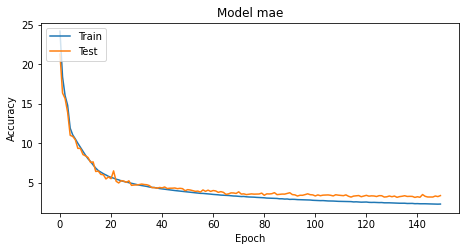

In [ ]:
import tensorflow as tf
import keras
import os
import time
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
import numpy as np
np.random.seed(2)
import tensorflow as tf
tf.config.run_functions_eagerly(True)
#tf.enable_eager_execution()
from keras import layers
from keras import optimizers
from keras.layers import Dropout, Flatten, Conv1D
from keras.layers import Dense, Flatten, Dropout
from keras import backend as K
import uuid

tf.keras.backend.clear_session()

batch_size = 128
epochs = 150
random_state = 9990
test_size = 0.1

x_samples = np.dstack((vec_T, vec_R))
y_samples = vec_structure[:,:,:2].astype(np.float32)

x_train, x_test, y_train, y_test = train_test_split(x_samples, y_samples, 
                                                    test_size=test_size,
                                                    random_state = random_state)

x_test, x_dev, y_test, y_dev = train_test_split(x_test, y_test, 
                                                    test_size=0.5,
                                                random_state=0)


print('x train')
print(x_train.shape)
print('x test')
print(x_test.shape)
print('x dev')
print(x_dev.shape)
print('y')
print(y_train.dtype)

# Model
num_transformer_blocks_t = 2
num_transformer_blocks_r = 1
T_vec_input = Input(shape=x_train.shape[1])
R_vec_input = Input(shape=x_train.shape[1])
R_vec_first_layer = R_vec_input
T_vec_first_layer = T_vec_input
t = tf.expand_dims(T_vec_first_layer, -1) #-1 denotes the last dimension
t = stack_block_transformer_spatial(num_transformer_blocks_t,t)
t = Dropout(0.1)(t)
t = layers.Dense(100, activation='selu')(t)
r = tf.expand_dims(R_vec_first_layer, -1) #-1 denotes the last dimension
r = stack_block_transformer_spatial(num_transformer_blocks_r,r)
r = Dropout(0.1)(r)
r = layers.Dense(100, activation='selu')(r)

concat_first = tf.keras.layers.Concatenate()([r,
                                              t])
num_transformer_blocks = 2
x = Dense(512, activation='relu')(concat_first)
x = Dense(256, activation='selu')(x)
x = tf.expand_dims(x, -1) #-1 denotes the last dimension
x = stack_block_transformer_spatial(num_transformer_blocks,x)
x = Dropout(0.1)(x)
x = layers.Dense(100, activation='selu')(x)
x = Dense(25, activation='selu')(x)
Width_output = Dense(y_train.shape[1], activation='relu')(x)
Refidx_output = Dense(2, activation='softmax')(x)

model = Model(inputs=[T_vec_input, R_vec_input],
              outputs=[Width_output, Refidx_output])

model.summary()
plot_model(model, 
           to_file='/content/drive/MyDrive/Thin_layers_data/model_plot.png',
           show_shapes=True, show_layer_names=False)


# model compilation
model.compile(loss=['mae', 'sparse_categorical_crossentropy'], 
              loss_weights=[1.0, 1.0],
              optimizer=tf.keras.optimizers.RMSprop(1e-3),
              metrics=['mae'])

# save model
model_file = '/content/drive/MyDrive/Thin_layers_data/model.h5'
checkpoint = ModelCheckpoint(model_file, verbose=1, monitor='val_loss', 
                             save_best_only=True, mode='auto')

# model fit
history = model.fit([x_train[:,:,0], x_train[:,:,1]], [y_train[:,:,1], y_train[:,0,0]],
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=([x_dev[:,:,0], 
                            x_dev[:,:,1]], [y_dev[:,:,1], y_dev[:,0,0]]),
          callbacks=[checkpoint])

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model mae')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
loss_history = np.array(history.history['loss'])
val_loss_history = np.array(history.history['val_loss'])

outfile = "/content/drive/MyDrive/Thin_layers_data/unknown_layers_Transformer_history"
np.savez(outfile, loss_history = loss_history, val_loss_history = val_loss_history)

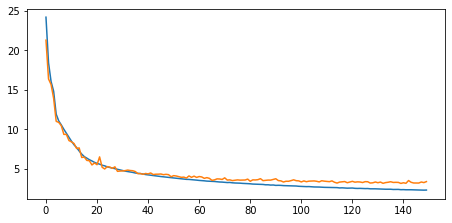

In [ ]:
outfile = '/content/drive/MyDrive/Thin_layers_data/unknown_layers_Transformer_history.npz'
npzfile = np.load(outfile)
d = dict(npzfile)
plt.figure()
plt.plot(d['loss_history'])
plt.plot(d['val_loss_history'])
plt.show()

 2/32 [>.............................] - ETA: 1s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


32/32 [==============================] - 1s 45ms/step

i = 0, index = 6
n original:
0.0
d original:
[4.934e-06 9.341e-06 7.156e-06 7.571e-06 3.291e-06]
n prediction:
0.0
d prediction:
[5.0662234e-06 9.4709858e-06 6.0306320e-06 7.6071574e-06 4.2209272e-06]


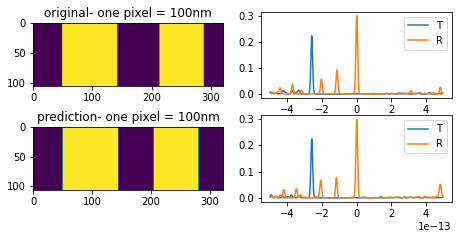

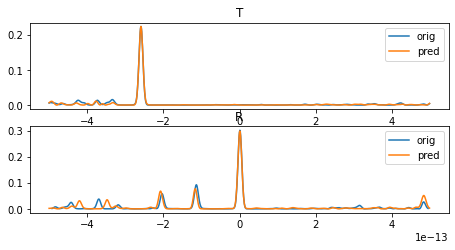

correlation t = 99.53% 
correlation r = 95.79% 
correlation structure = 91.0%
 3/32 [=>............................] - ETA: 1s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


32/32 [==============================] - 1s 45ms/step

i = 1, index = 6
n original:
0.0
d original:
[4.934e-06 9.341e-06 7.156e-06 7.571e-06 3.291e-06]
n prediction:
0.0
d prediction:
[5.0662234e-06 9.4709858e-06 6.0306320e-06 7.6071574e-06 4.2209272e-06]


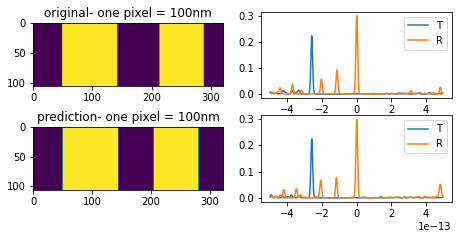

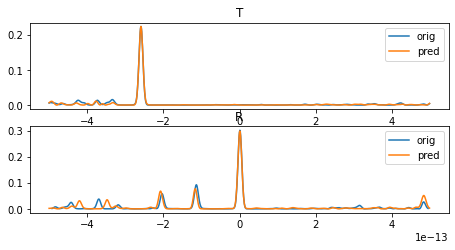

correlation t = 99.53% 
correlation r = 95.79% 
correlation structure = 91.0%
 3/32 [=>............................] - ETA: 1s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


32/32 [==============================] - 1s 45ms/step

i = 2, index = 9
n original:
1.0
d original:
[6.110e-07 2.174e-06 7.300e-07 5.865e-06 0.000e+00]
n prediction:
1.0
d prediction:
[7.1420834e-07 2.5877428e-06 5.6312683e-07 5.5747614e-06 0.0000000e+00]


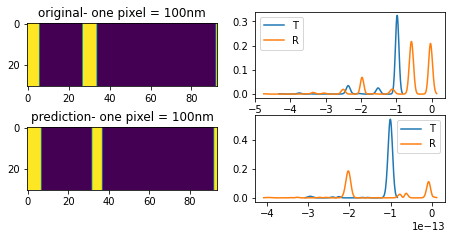

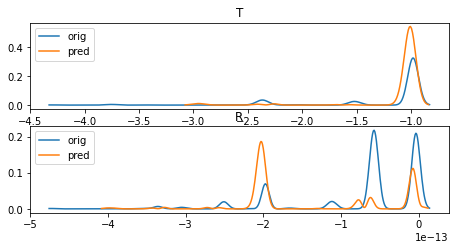

correlation t = 91.43% 
correlation r = 43.5% 
correlation structure = 85.0%


In [ ]:
# Add graphics that compare structures and waveforms

# START- the relevat parts form the pycharm project

c_const = 3e8 * meter / second
n_ref = 1

f_vec = np.fft.fftshift(np.fft.fftfreq(t_vec.shape[0], d=dt))
omega_vec = (2 * np.pi * f_vec)
lambda_vec = (2 * np.pi * c_const / omega_vec)

def P_matrix(n, d, wave_length):
    phase = 2 * (math.pi / wave_length) * d * n
    P11 = cmath.exp(-1j * phase)
    P22 = cmath.exp(1j * phase)
    P = np.array([[P11, 0], [0, P22]])
    return P

def T_matrix(n1, n2):
    n1 = n1.real
    n2 = n2.real
    T11 = (n1 + n2) / (2 * n1)
    T12 = (n1 - n2) / (2 * n1)
    T21 = (n1 - n2) / (2 * n1)
    T22 = (n1 + n2) / (2 * n1)
    T = np.array([[T11, T12], [T21, T22]])
    return T

def P_list(NDlist, wave_length):
    lis = []
    for i in range(len(NDlist) - 2):
        n = NDlist[i + 1][0]
        d = NDlist[i + 1][1]
        lis.append(P_matrix(n, d, wave_length))
    return lis

def T_list(NDlist):
    lis = []
    for i in range(len(NDlist) - 1):
        lis.append(T_matrix(NDlist[i][0], NDlist[i + 1][0]))
    return lis

def M_matrix(NDlist, wave_length):
    Tlist = T_list(NDlist)
    Plist = P_list(NDlist, wave_length)
    M = np.array([[1, 0], [0, 1]])
    for i in range(len(Plist)):
        m = np.dot(Tlist[i], Plist[i])
        M = np.dot(M, m)
    M = np.dot(M, Tlist[-1])
    return M

def reflectance(NDlist, wave_length):
    M = M_matrix(NDlist, wave_length)
    r = M[1][0] / M[0][0]
    return r

def transmittance(NDlist, wave_length):
    M = M_matrix(NDlist, wave_length)
    t = 1 / M[0][0]
    return t

def t_spectrum_vec(NDlist, vec):
    lis = []
    for i in range(vec.shape[0]):
        t = transmittance(NDlist, vec[i])
        lis.append(t)
    return lis


def r_spectrum_vec(NDlist, vec):
    lis = []
    for i in range(vec.shape[0]):
        r = reflectance(NDlist, vec[i])
        lis.append(r)
    return lis

def generate_vector(NDlist):
    width_time = 12 * fs
    carrier_wavelength = 800 * nm
    omega_0 = np.divide((2 * np.pi * c_const), (n_ref * carrier_wavelength))
    input_wave_amp = np.exp(- 2 * np.log(2) * np.square(t_vec / (width_time)))
    input_wave_phase = 0
    input_wave_phase = input_wave_phase + omega_0 * t_vec
    input_wave = input_wave_amp * np.exp(1j * input_wave_phase)
    input_wave_spectrum = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(input_wave)))
    reflected_lambda = r_spectrum_vec(NDlist, lambda_vec) * input_wave_spectrum
    transmitted_lambda = t_spectrum_vec(NDlist, lambda_vec) * input_wave_spectrum
    output_wave_reflected = np.fft.ifftshift(np.fft.ifft(np.fft.fftshift(reflected_lambda)))
    output_wave_transmitted = np.fft.ifftshift(np.fft.ifft(np.fft.fftshift(transmitted_lambda)))
    return (np.abs(output_wave_transmitted) ** 2), (np.abs(output_wave_reflected) ** 2)

# END- the relevat parts form the pycharm project

def create_NDlist(n , d):
  NDlist = np.zeros((len(d),2))
  for i in range(len(d)):
    if i % 2 == n:
      NDlist[i,0] = 3.4777237564709433
    else:
      NDlist[i,0] = 1.4440236216729967
  NDlist[:,1] = d
  return NDlist

def plot_structure(NDlist):
  # d1 = int(NDlist[0][1] * (10**7))
  # d2 = int(NDlist[1][1] * (10**7))
  d = NDlist[:,1] * (10**7)

  d_sum = int(np.sum(d))
  image = np.zeros((int(d_sum/3) , d_sum))
  n = int(NDlist[0][0] < NDlist[1][0])
  point = 0
  for i in range(len(d)-1):
    image[:,point:point+ int(d[i])] = 255 * ((i-n)%2)
    point = point + int(d[i])
  image[: ,point:] = 255 * ((i-n+1)%2)
  return image

def add_air(NDlist):
  new = np.zeros((NDlist.shape[0] + 2,2))
  new[0,0] = 1
  new[NDlist.shape[0] + 1,0] = 1
  new[0,1] = 0
  new[NDlist.shape[0] + 1,1] = 0
  new[1:-1, :] = NDlist
  return new

def calculate_correlation_structure(NDlist_original, NDlist_prediction):
  if NDlist_original[0,0] != NDlist_prediction[0,0] or ((NDlist_original[:,1] == 0) != (NDlist_prediction[:,1] == 0)).any():
    return 0
  num_of_layers = np.sum((NDlist_original[:,1] != 0))
  corr = 0
  for i in range(num_of_layers):
      corr += min(d_original[i], d_prediction[i])/(max(d_original[i], d_prediction[i]))
  corr /= num_of_layers
  corr *= 100
  corr = int(corr)/100
  return corr

def correl(x,y):
  up = abs(x-y)
  down = x+y
  correl = 1 - np.average(up/down)
  return correl


########################################
# THE MAIN PART OF THE CODE STARTS HERE!
########################################

# n_prediction = 0 or 1
# d_prediction = [d1 , d2, d3, ... , d20]

mm = 10**(-6)

for i in range(3):
  index = random.randint(0,9)
  n_original = y_test[index][0,0]
  d_original = y_test[index,:,1] * (10**-7)

  y_pred = model.predict([x_test[:,:,0], x_test[:,:,1]])
  n_prediction_vector = np.float32(y_pred[1] < 0.5)[:,0]
  d_prediction_vector = y_pred[0]* (10**-7)

  n_prediction = n_prediction_vector[index]
  d_prediction = d_prediction_vector[index]
  print("\ni = {}, index = {}".format(i, index))
  print("n original:")
  print(n_original)
  print("d original:")
  print(d_original)
  print("n prediction:")
  print(n_prediction)
  print("d prediction:")
  print(d_prediction)

  NDlist_original = create_NDlist(n_original, d_original)
  NDlist_prediction = create_NDlist(n_prediction, d_prediction)

  plt.figure(i)
  image_original = plot_structure(NDlist_original)
  image_prediction = plot_structure(NDlist_prediction)
  plt.subplot(2,2,1)
  plt.imshow(image_original)
  plt.title('original- one pixel = 100nm')
  plt.subplot(2,2,3)
  plt.imshow(image_prediction)
  plt.title('prediction- one pixel = 100nm')
  plt.subplot(2,2,2)
  x_t_original, y_t_original = non_zero(t_vec, x_test[index, :,0])
  x_r_original, y_r_original = non_zero(t_vec, x_test[index, :,1])
  plt.plot(x_t_original, y_t_original)
  plt.plot(x_r_original, y_r_original)
  plt.legend(['T' , 'R'])
  plt.subplot(2,2,4)
  y_t_prediction0, y_r_prediction0 = generate_vector(add_air(NDlist_prediction))
  x_t_prediction, y_t_prediction = non_zero(t_vec, y_t_prediction0)
  x_r_prediction, y_r_prediction = non_zero(t_vec, y_r_prediction0)
  plt.plot(x_t_prediction, y_t_prediction)
  plt.plot(x_r_prediction, y_r_prediction)
  plt.legend(['T' , 'R'])
  plt.figure()
  plt.subplot(2,1,1)
  plt.plot(x_t_original, y_t_original)
  plt.plot(x_t_prediction, y_t_prediction)
  plt.legend(['orig' , 'pred'])
  plt.title('T')
  plt.subplot(2,1,2)
  plt.plot(x_r_original, y_r_original)
  plt.plot(x_r_prediction, y_r_prediction)
  plt.legend(['orig' , 'pred'])
  plt.title('R')

  plt.show()

  correlation_t = int(10000 * np.abs(np.corrcoef(x_test[index, :,0], y_t_prediction0)[0,1]))/100
  correlation_r = int(10000 * np.abs(np.corrcoef(x_test[index, :,1], y_r_prediction0)[0,1]))/100
  correlation_structure = int(calculate_correlation_structure(NDlist_original, NDlist_prediction) * 10000)/100
  print("correlation t = {}% \ncorrelation r = {}% \ncorrelation structure = {}%".format(correlation_t, correlation_r, correlation_structure))

 3/32 [=>............................] - ETA: 1s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


32/32 [==============================] - 2s 47ms/step


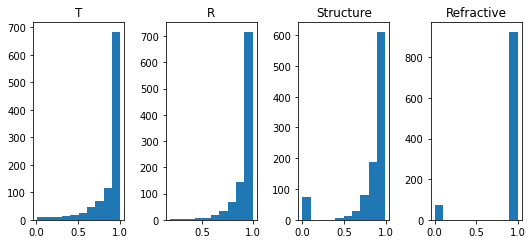

average T: 87.89
average R: 92.13
average Structure: 83.06
average Refractive: 92.5


In [ ]:
# Histogram of Correlation for the test set

plt.rcParams["figure.figsize"] = [7.5, 3.5]

y_pred = model.predict([x_test[:,:,0], x_test[:,:,1]])
n_prediction_vector = np.float32(y_pred[1] < 0.5)[:,0]
d_prediction_vector = y_pred[0] * (10**-7)

def prediction(index, n_prediction_vector, d_prediction_vector):
  n_prediction = n_prediction_vector[index]
  d_prediction = d_prediction_vector[index]
  return n_prediction, d_prediction

def ND_to_TR(n_prediction, d_prediction):
  NDlist_prediction = create_NDlist(n_prediction, d_prediction)
  t_prediction, r_prediction = generate_vector(add_air(NDlist_prediction))
  return t_prediction, r_prediction

correlation_structure = []
vec_t_original = x_test[:,:,0]
vec_r_original = x_test[:,:,1]
vec_t_prediction = []
vec_r_prediction = []
refractive_correlation = []
for i in range(len(x_test)):
  n_prediction, d_prediction = prediction(i, n_prediction_vector, d_prediction_vector)
  t_prediction, r_prediction = ND_to_TR(n_prediction, d_prediction)
  vec_t_prediction.append(t_prediction)
  vec_r_prediction.append(r_prediction)
  n_original = y_test[i,0,0]
  d_original = y_test[i,:,1]
  d_original = d_original * (10**-7)
  if n_original == n_prediction and ((d_original == 0) == (d_prediction == 0)).all():
    refractive_correlation.append(1)
  else:
    refractive_correlation.append(0)
  NDlist_original = create_NDlist(n_original, d_original)
  NDlist_prediction = create_NDlist(n_prediction, d_prediction)
  correlation_structure.append(calculate_correlation_structure(NDlist_original, NDlist_prediction))

vec_t_prediction = np.array(vec_t_prediction)
vec_r_prediction = np.array(vec_r_prediction)

# Calculate correlation
correlation_vec_t = []
correlation_vec_r = []
for i in range(len(x_test)):
  correlation_vec_t.append(np.abs(np.corrcoef(vec_t_original[i], vec_t_prediction[i])[0,1]))
  correlation_vec_r.append(np.abs(np.corrcoef(vec_r_original[i], vec_r_prediction[i])[0,1]))

correlation_structure = np.array(correlation_structure)
correlation_vec_t = np.array(correlation_vec_t)
correlation_vec_r = np.array(correlation_vec_r)
  
plt.figure()
plt.subplot(1,4,1)
plt.title('T')
plt.hist(correlation_vec_t)
plt.subplot(1,4,2)
plt.title('R')
plt.hist(correlation_vec_r)
plt.subplot(1,4,3)
plt.title('Structure')
plt.hist(correlation_structure)
plt.subplot(1,4,4)
plt.title('Refractive')
plt.hist(refractive_correlation)
plt.show()

print('average T: ' + str(int(np.average(correlation_vec_t) * 10000)/100))
print('average R: ' + str(int(np.average(correlation_vec_r) * 10000)/100))
print('average Structure: ' + str(int(np.average(correlation_structure) * 10000)/100))
print('average Refractive: ' + str(int(np.average(refractive_correlation) * 10000)/100))

In [ ]:
outfile = "/content/drive/MyDrive/Thin_layers_data/unknown_layers_Transformer_examples"
savez_dict = {}
for i in range(300):
  savez_dict['unknown_layers_Transformer_t_original_example' + str(i)] = vec_t_original[i]
  savez_dict['unknown_layers_Transformer_t_prediction_example' + str(i)] = vec_t_prediction[i]
  savez_dict['unknown_layers_Transformer_r_original_example' + str(i)] = vec_r_original[i]
  savez_dict['unknown_layers_Transformer_r_prediction_example' + str(i)] = vec_r_prediction[i]
np.savez(outfile, t_vec = t_vec, **savez_dict)

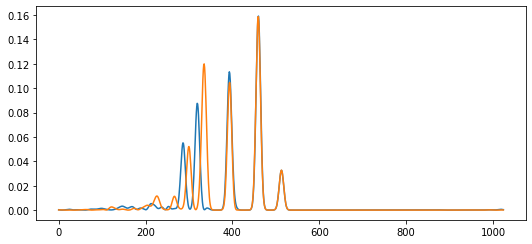

In [ ]:
outfile = '/content/drive/MyDrive/Thin_layers_data/unknown_layers_Transformer_examples.npz'
npzfile = np.load(outfile)
d = dict(npzfile)
plt.figure()
plt.plot(d['unknown_layers_Transformer_r_original_example20'])
plt.plot(d['unknown_layers_Transformer_r_prediction_example20'])
plt.show()

In [ ]:
outfile = "/content/drive/MyDrive/Thin_layers_data/unknown_layers_Transformer_histogram"
np.savez(outfile, T_histogram = correlation_vec_t,
         R_histogram = correlation_vec_r,
         Structure_histogram = correlation_structure,
         Refractive_histogram = refractive_correlation)

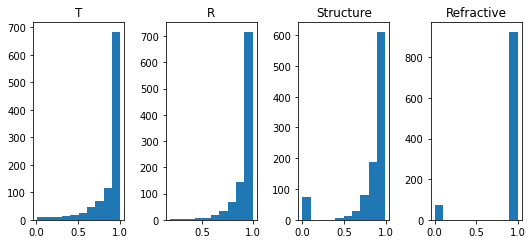

In [ ]:
outfile = '/content/drive/MyDrive/Thin_layers_data/unknown_layers_Transformer_histogram.npz'
npzfile = np.load(outfile)
d = dict(npzfile)

plt.figure()
plt.subplot(1,4,1)
plt.title('T')
plt.hist(d['T_histogram'])
plt.subplot(1,4,2)
plt.title('R')
plt.hist(d['R_histogram'])
plt.subplot(1,4,3)
plt.title('Structure')
plt.hist(d['Structure_histogram'])
plt.subplot(1,4,4)
plt.title('Refractive')
plt.hist(d['Refractive_histogram'])
plt.show()

In [ ]:
def subtraction(image_original, image_prediction):
  d = max(image_original.shape[1], image_prediction.shape[1])
  h = min(image_original.shape[0], image_prediction.shape[0])
  sub1 = np.zeros((h,d))
  sub1[:,:image_original.shape[1]] = image_original[:h,:]
  sub2 = np.zeros((h,d))
  sub2[:,:image_prediction.shape[1]] = image_prediction[:h,:]
  sub = np.abs(sub1-sub2)
  sub = (sub > 1) * 255
  return sub

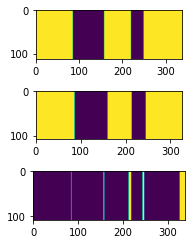

(113, 339)
(109, 327)
(109, 339)


In [ ]:
outfile = '/content/drive/MyDrive/Thin_layers_data/unknown_layers_Transformer_filters.npz'
npzfile = np.load(outfile)
d = dict(npzfile)
image_original = d['original0']
image_prediction = d['prediction0']
sub = subtraction(image_original, image_prediction)
plt.figure()
plt.subplot(3,1,1)
plt.imshow(image_original)
plt.subplot(3,1,2)
plt.imshow(image_prediction)
plt.subplot(3,1,3)
plt.imshow(sub)
plt.show()
print(image_original.shape)
print(image_prediction.shape)
print(sub.shape)

In [ ]:
#generate filter images
outfile = "/content/drive/MyDrive/Thin_layers_data/unknown_layers_Transformer_filters"
savez_dict = {}

n_original_vector = y_test[:,0,0]
d_original_vector = y_test[:,:,1] * (10**-7)
for i in range(300):
  NDlist_original = create_NDlist(n_original_vector[i], d_original_vector[i])
  NDlist_prediction = create_NDlist(n_prediction_vector[i], d_prediction_vector[i])
  image_original = plot_structure(NDlist_original)
  image_prediction = plot_structure(NDlist_prediction)
  sub = subtraction(image_original, image_prediction)
  savez_dict['original' + str(i)] = image_original
  savez_dict['prediction' + str(i)] = image_prediction
  savez_dict['subtraction' + str(i)] = sub

np.savez(outfile, **savez_dict)

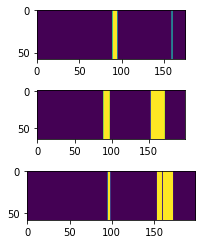

(58, 176)
(66, 199)
(58, 199)


In [ ]:
outfile = '/content/drive/MyDrive/Thin_layers_data/unknown_layers_Transformer_filters.npz'
npzfile = np.load(outfile)
d = dict(npzfile)
plt.figure()
plt.subplot(3,1,1)
plt.imshow(d['original2'])
plt.subplot(3,1,2)
plt.imshow(d['prediction2'])
plt.subplot(3,1,3)
plt.imshow(d['subtraction2'])
plt.show()
print(d['original2'].shape)
print(d['prediction2'].shape)
print(d['subtraction2'].shape)

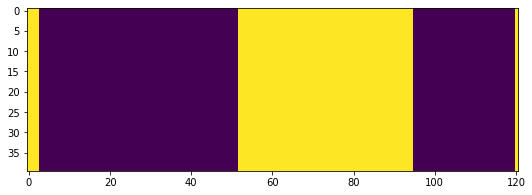

In [ ]:
plt.imshow(image_original)
plt.show()

In [ ]:
# Saving images as PDF

plt.rcParams["figure.figsize"] = [15, 7.50]
plt.rcParams["figure.autolayout"] = True

for i in range(300):
  index = i
  n_original = y_test[index][0,0]
  d_original = y_test[index,:,1] * (10**-7)

  y_pred = model.predict([x_test[:,:,0], x_test[:,:,1]])
  n_prediction_vector = np.float32(y_pred[1] < 0.5)[:,0]
  d_prediction_vector = y_pred[0]* (10**-7)

  n_prediction = n_prediction_vector[index]
  d_prediction = d_prediction_vector[index]

  NDlist_original = create_NDlist(n_original, d_original)
  NDlist_prediction = create_NDlist(n_prediction, d_prediction)

  plt.figure()
  image_original = plot_structure(NDlist_original)
  image_prediction = plot_structure(NDlist_prediction)
  correlation_structure = int(calculate_correlation_structure(NDlist_original, NDlist_prediction) * 100)
  plt.subplot(3,2,1)
  plt.imshow(image_original)
  plt.title('original- one pixel = 100nm | structure correlation: {}%'.format(correlation_structure))
  plt.subplot(3,2,3)
  plt.imshow(image_prediction)
  plt.title('prediction- one pixel = 100nm | structure correlation: {}%'.format(correlation_structure))
  plt.subplot(3,2,2)
  x_t_original, y_t_original = non_zero(t_vec, x_test[index, :,0])
  x_r_original, y_r_original = non_zero(t_vec, x_test[index, :,1])
  plt.plot(x_t_original, y_t_original)
  plt.plot(x_r_original, y_r_original)
  plt.legend(['T' , 'R'])
  plt.title("original")
  plt.subplot(3,2,4)
  y_t_prediction0, y_r_prediction0 = generate_vector(add_air(NDlist_prediction))
  x_t_prediction, y_t_prediction = non_zero(t_vec, y_t_prediction0)
  x_r_prediction, y_r_prediction = non_zero(t_vec, y_r_prediction0)
  plt.plot(x_t_prediction, y_t_prediction)
  plt.plot(x_r_prediction, y_r_prediction)
  plt.legend(['T' , 'R'])
  plt.title("prediction")
  plt.subplot(3,2,5)
  plt.plot(x_t_original, y_t_original)
  plt.plot(x_t_prediction, y_t_prediction)
  plt.legend(['orig' , 'pred'])
  correlation_t = int(100 * np.abs(np.corrcoef(x_test[index, :,0], y_t_prediction0)[0,1]))
  plt.title('T - correlation: {}%'.format(correlation_t))
  plt.subplot(3,2,6)
  plt.plot(x_r_original, y_r_original)
  plt.plot(x_r_prediction, y_r_prediction)
  plt.legend(['orig' , 'pred'])
  correlation_r = int(100 * np.abs(np.corrcoef(x_test[index, :,1], y_r_prediction0)[0,1]))
  plt.title('R - correlation: {}%'.format(correlation_r))


def save_multi_image(filename):
   pp = PdfPages(filename)
   fig_nums = plt.get_fignums()
   figs = [plt.figure(n) for n in fig_nums]
   for fig in figs:
      fig.savefig(pp, format='pdf')
   pp.close()

filename = "/content/drive/MyDrive/Thin_layers_data/images_unknown_layers_Transformer.pdf"
save_multi_image(filename)

Output hidden; open in https://colab.research.google.com to view.